初始<u1,u2>: [0.67993422 0.25265331]
0 [30.74585192 29.19476021]
1 [32.81894202 27.37628756]
2 [37.24482653 22.9979267 ]
3 [39.66199015 20.70345188]
4 [39.94637139 20.49626184]
5 [39.97954637 20.49745542]
6 [39.98794407 20.50358652]
7 [39.99112845 20.50650057]
8 [39.99244287 20.50774332]
9 [39.99299265 20.50826565]
10 [39.99322305 20.50848472]
11 [39.99331963 20.50857657]
12 [39.99336012 20.50861508]


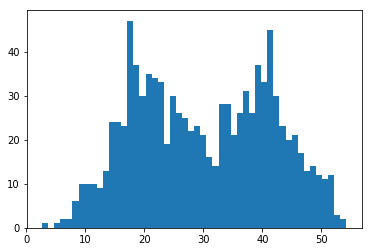

In [2]:
# https://www.cnblogs.com/slgkaifa/p/6731779.html

#coding:gbk
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

isdebug = False

# 指定k个高斯分布參数。这里指定k=2。注意2个高斯分布具有同样均方差Sigma，分别为Mu1,Mu2。

def ini_data(Sigma,Mu1,Mu2,k,N):
    global X
    global Mu
    global Expectations
    X = np.zeros((1,N))
    Mu = np.random.random(2)
    Expectations = np.zeros((N,k))
    for i in range(0,N):
        if np.random.random(1) > 0.5:
            X[0,i] = np.random.normal()*Sigma + Mu1
        else:
            X[0,i] = np.random.normal()*Sigma + Mu2
    if isdebug:
        print("***********")
        print(u"初始观測数据X：")
        print(X)
# EM算法：步骤1，计算E[zij]
def e_step(Sigma,k,N):
    global Expectations
    global Mu
    global X
    for i in range(0,N):
        Denom = 0
        for j in range(0,k):
            Denom += math.exp((-1/(2*(float(Sigma**2))))*(float(X[0,i]-Mu[j]))**2)
        for j in range(0,k):
            Numer =  math.exp((-1/(2*(float(Sigma**2))))*(float(X[0,i]-Mu[j]))**2)
            Expectations[i,j] = Numer / Denom
    if isdebug:
        print("***********")
        print(u"隐藏变量E（Z）：")
        print(Expectations)
# EM算法：步骤2，求最大化E[zij]的參数Mu
def m_step(k,N):
    global Expectations
    global X
    for j in range(0,k):
        Numer = 0
        Denom = 0
        for i in range(0,N):
            Numer += Expectations[i,j]*X[0,i]
            Denom +=Expectations[i,j]
        Mu[j] = Numer / Denom 
# 算法迭代iter_num次。或达到精度Epsilon停止迭代
def run(Sigma,Mu1,Mu2,k,N,iter_num,Epsilon):
    ini_data(Sigma,Mu1,Mu2,k,N)
    print(u"初始<u1,u2>:", Mu)
    for i in range(iter_num):
        Old_Mu = copy.deepcopy(Mu)
        e_step(Sigma,k,N)
        m_step(k,N)
        print(i,Mu)
        if sum(abs(Mu-Old_Mu)) < Epsilon:
            break
if __name__ == '__main__':
   run(6,40,20,2,1000,1000,0.0001)
   plt.hist(X[0,:],50)
   plt.show()